Realizar o teste do codigo da aula 07 no notion, sobre KNN em Python com SKLearn.

--- Métricas para k=5 ---
Acurácia: 0.7545
Precisão: 0.7530
Recall: 0.7545
F1-Score: 0.7522
Matriz de Confusão:
 [[ 452   41  294]
 [  21 2067  328]
 [ 151  417 1329]]


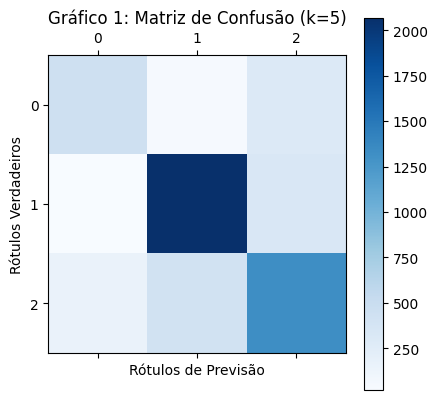

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

data = pd.read_csv("../database/california_housing_train.csv")

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

y = pd.cut(y, bins=3, labels=['baixo', 'médio', 'alto'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

knn_cls = KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(X_train, y_train)
y_pred = knn_cls.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted', zero_division='warn')
recall = recall_score(y_val, y_pred, average='weighted', zero_division='warn')
f1 = f1_score(y_val, y_pred, average='weighted', zero_division='warn')

print("--- Métricas para k=5 ---")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# Gráfico da Matriz de Confusão
cm = confusion_matrix(y_val, y_pred)
print("Matriz de Confusão:\n", cm)

plt.matshow(cm, cmap="Blues")
plt.title("Gráfico 1: Matriz de Confusão (k=5)")
plt.colorbar()
plt.xlabel("Rótulos de Previsão")
plt.ylabel("Rótulos Verdadeiros")
plt.show()

